# Математична статистика. Домашнє завдання 2. 
Варiацiйний ряд, емпiрична функцiя розподiлу, вибiрковi моменти, вибiркове середнє та дисперсiя

In [139]:
import numpy as np
from scipy.stats import norm
import statistics as stat
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)

### Завдання 1

Для вибiрки з 25 чисел, згенерованої за допомогою онлайн-генератора випадкових чисел:

In [113]:
n = 25
x = np.round_(np.random.random(n) * 100, 2)
print(x)

[61.84 68.55 84.64 34.79  2.58 27.08 82.18 74.61 80.12 86.81 95.27 41.27
 20.87 43.3   7.4  79.14 77.32 97.95  8.54 53.42 12.6  78.77 58.66 75.08
 66.88]


a) побудуйте варiацiйний ряд i знайдiть розмах;

In [114]:
y = sorted(x)
print("sorted =", y)
print()
r = y[-1] - y[0]
print("range =", r)

sorted = [2.58, 7.4, 8.54, 12.6, 20.87, 27.08, 34.79, 41.27, 43.3, 53.42, 58.66, 61.84, 66.88, 68.55, 74.61, 75.08, 77.32, 78.77, 79.14, 80.12, 82.18, 84.64, 86.81, 95.27, 97.95]

range = 95.37


б) знайдiть вибiркову медiану та квартилi, побудуйте дiаграму розмаху;

median = 66.88
quantiles = [30.935, 66.88, 79.63]


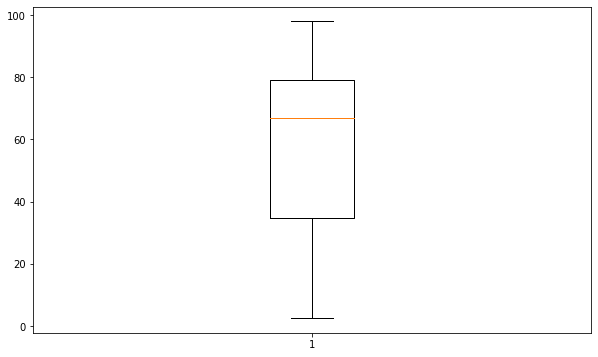

In [115]:
m = stat.median(x)
print("median =", m)

print("quantiles =", stat.quantiles(x))

plt.boxplot(x)
plt.show()

в) знайдiть значення емпiричної функцiї розподiлу в точцi 30 та побудуйте
наближений 95%-й довiрчий iнтеграл для значення iстинної функцiї розподiлу
в цiй точцi методами Вальда та Вiлсона;

In [116]:
emp = sum(x<30)/n
print("empirical value =", emp)

empirical value = 0.24


In [117]:
al = 0.05
z = norm.ppf(1 - al/2)

Метод Вальда:

In [118]:
teta_min = emp - z * (emp * (1 - emp) / n)**0.5
teta_max = emp + z * (emp * (1 - emp) / n)**0.5

print(round(teta_min, 4), round(teta_max, 4))

0.0726 0.4074


Метод Вільсона:

In [119]:
teta_min_1 = (n*emp + z**2/2)/(n + z**2) - z/(n + z**2) * (n * emp * (1 - emp) + z**2/4)**0.5
teta_max_1 = (n*emp + z**2/2)/(n + z**2) + z/(n + z**2) * (n * emp * (1 - emp) + z**2/4)**0.5

print(round(teta_min_1, 4), round(teta_max_1, 4))

0.115 0.4343


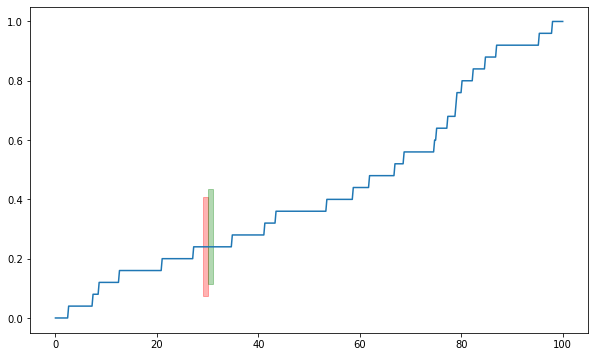

In [129]:
def ecdf(data, r):
    return sum(data<r)/len(data)

t = np.linspace(0, 100, 500)
y = []
for i in t:
    y.append(ecdf(x, i))
y = np.array(y)

plt.plot(t, y)
plt.fill_between(np.linspace(29, 30, 2), teta_min, teta_max, color="red", alpha=0.3)
plt.fill_between(np.linspace(30, 31, 2), teta_min_1, teta_max_1, color="green", alpha=0.3)

г) знайдiть вибiркове середнє.

In [121]:
x_mean = np.mean(x)
print("mean =", x_mean)

mean = 56.7868


### Завдання 2

Для оцiнок студентiв iз математики (math score), взятих iз датасету Успiшнiсть студентiв:

In [208]:
df = pd.read_csv("StudentsPerformance.csv")
grades = df["math score"]
print(grades)

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64


а) побудуйте емпiричну функцiю розподiлу;

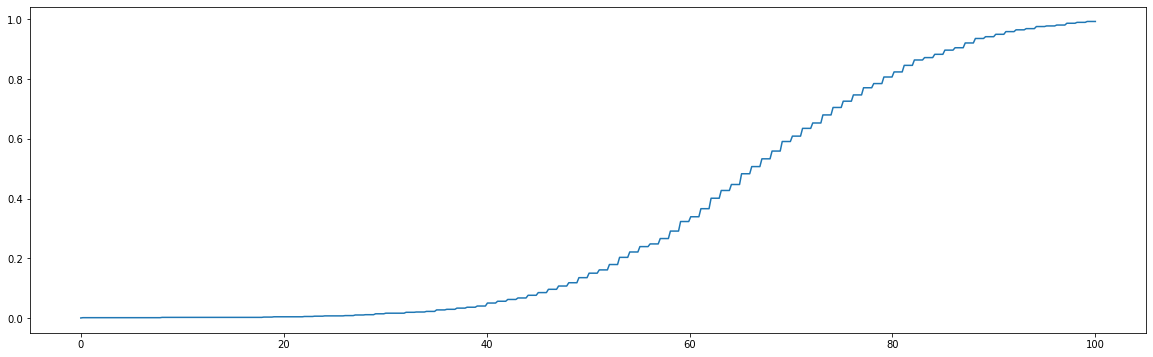

In [209]:
t = np.linspace(0, 100, 500)
y = []
for i in t:
    y.append(ecdf(grades, i))
y = np.array(y)

plt.plot(t, y)

б) побудуйте гiстограму значень;

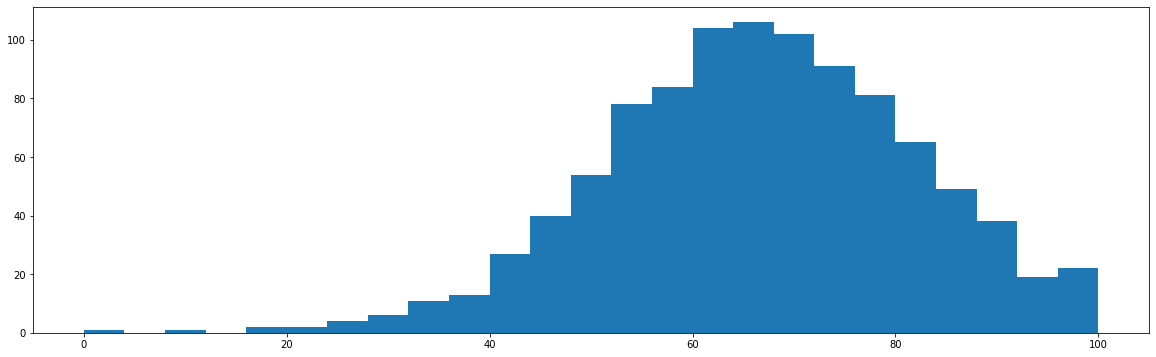

In [210]:
plt.hist(grades, bins=25)
plt.show()

в) побудуйте дiаграму розсiяння для оцiнок з математики та читання;

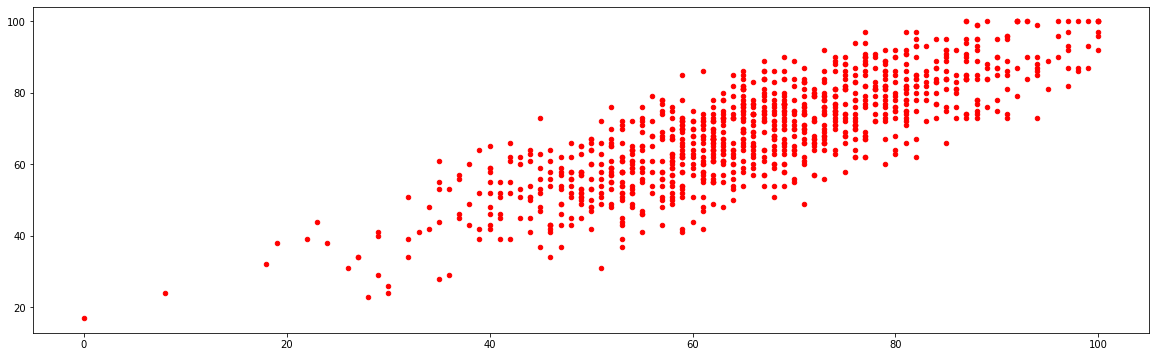

In [211]:
plt.scatter(grades, df["reading score"], s = 20, c="red")

г) знайдiть вибiрковi середнє та дисперсiю;

In [212]:
grade_m = np.mean(grades)
print("sample mean grade =", grade_m)

grade_v = np.var(grades)
print("biased sample variance =", grade_v)

sample mean grade = 66.089
biased sample variance = 229.68907899999996


д) побудуйте наближений 95%-й довiрчий iнтервал для середньої оцiнки студентiв з математики;

Ми намагаємося знайти такі $a, b$, що
$$P( a < \text{grade} < b) = 0.95$$
де $\text{grade}$ це випадкова величина балу з математики.

Маємо:
$$ \sqrt{n} \frac{\text{grade} - E[ \text{grade} ]}{\sqrt{Var (\text{grade})}} \sim N(0, 1)$$

Отже:
$$ a, b = E[ \text{grade} ] \pm \frac{\sqrt{Var (\text{grade})}}{\sqrt{n}} \ \mathcal{Z}_{1 - \frac{\alpha}2} $$

In [213]:
n = len(grades)
a = grade_m - (grade_v/n)**0.5 * z
b = grade_m + (grade_v/n)**0.5 * z

a, b

(65.14966984582541, 67.02833015417458)

е) пояснiть, що означає отриманий у попередньому пунктi довiрчий iнтервал.

Якщо повторити процедуру вибору студентів багато разiв, то приблизно 95% побудованих iнтервалiв мiститимуть iстинне значення середньої оцінки з математики

### Завдання 3

a) Зробiть завдання 2 (крiм останнього пункту) окремо для студентiв, якi
мали стандартний (standard) ланч, та для студентiв, якi мали безкоштовний або
уцiнений ланч (free/reduced) ланч.

In [214]:
standard = df[df["lunch"] == "standard"]
grades_standard = standard["math score"]
free = df[df["lunch"] == "free/reduced"]
grades_free = free["math score"]

Standard
70.03410852713178 186.12906916651644
( 68.98123710853935 , 71.08697994572421 )
Free
58.92112676056338 229.17687760365004
( 57.346348852707955 , 60.49590466841881 )


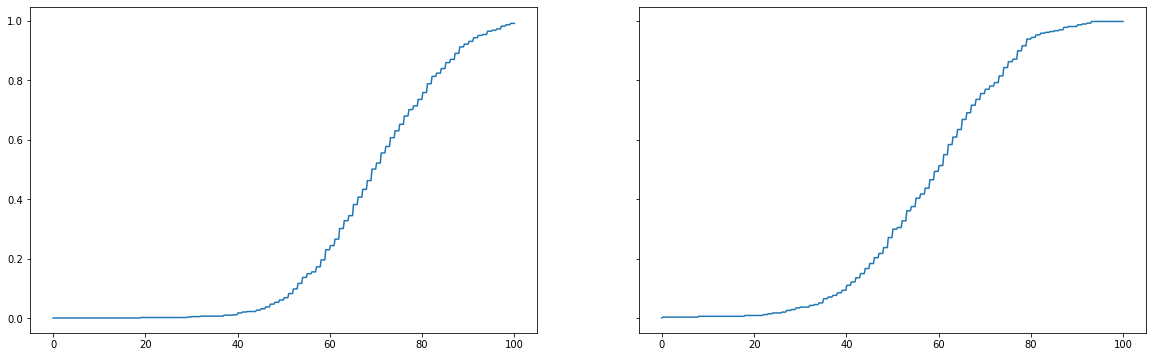

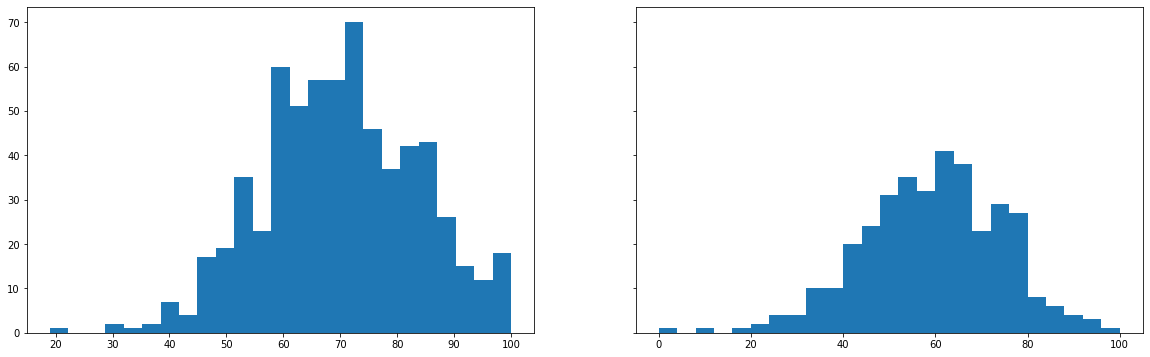

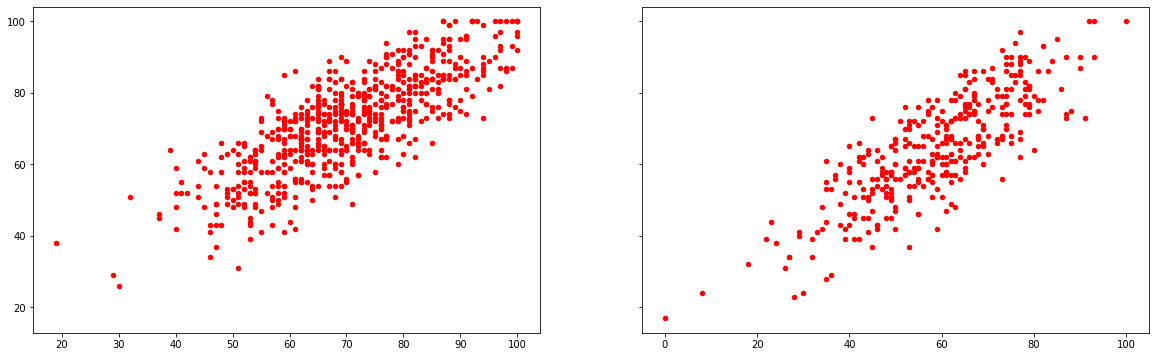

In [215]:
t = np.linspace(0, 100, 500)
y_1 = []
y_2 = []
for i in t:
    y_1.append(ecdf(grades_standard, i))
    y_2.append(ecdf(grades_free, i))
y_1, y_2 = np.array(y_1), np.array(y_2)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(t, y_1)
ax2.plot(t, y_2)


f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(grades_standard, bins=25)
ax2.hist(grades_free, bins=25)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(grades_standard, standard["reading score"], s = 20, c="red")
ax2.scatter(grades_free, free["reading score"], s = 20, c="red")

grade_standard_m = np.mean(grades_standard)
grade_standard_v = np.var(grades_standard)
n_standard = len(grades_standard)
print("Standard")
print(grade_standard_m, grade_standard_v)
a_standard = grade_standard_m - (grade_standard_v/n_standard)**0.5 * z
b_standard = grade_standard_m + (grade_standard_v/n_standard)**0.5 * z
print("(", a_standard, ",", b_standard, ")") 

grade_free_m = np.mean(grades_free)
grade_free_v = np.var(grades_free)
n_free = len(grades_free)
print("Free")
print(grade_free_m, grade_free_v)
a_free = grade_free_m - (grade_free_v/n_free)**0.5 * z
b_free = grade_free_m + (grade_free_v/n_free)**0.5 * z
print("(", a_free, ",", b_free, ")") 

б) Знайдiть наближений 95%-й довiрчий iнтервал для рiзницi середнiх успiшностей з математики цих двох категорiй студентiв.

З центральної граничної теореми: 
$$\overline{X_s} \sim N\left(E[X_s], \frac{Var(X_s)}{n_s}\right)$$
$$\overline{X_f} \sim N\left(E[X_f], \frac{Var(X_f)}{n_f}\right)$$

За припущення незалежності $\overline{X_s}$ та $\overline{X_f}$:

$$ \overline{X_s} - \overline{X_f} \sim N\left(E[X_s] - E[X_f], \frac{Var(X_s)}{n_s} + \frac{Var(X_f)}{n_f}\right) $$

Тобто 

$$a, b = E[X_s] - E[X_f] \pm \sqrt{\frac{Var(X_s)}{n_s} + \frac{Var(X_f)}{n_f}} \ \mathcal{Z}_{1 - \frac{\alpha}2}$$

In [216]:
a = grade_standard_m - grade_free_m - (grade_standard_v/n_standard + grade_free_v/n_free)**0.5 * z
b = grade_standard_m - grade_free_m + (grade_standard_v/n_standard + grade_free_v/n_free)**0.5 * z

a, b

(9.218657696310522, 13.00730583682627)

в) З рівнем довіри 95% можна стверджувати, що різниця потрібних середніх успішностей 
належить вказаному вище інтервалу, який повністю лежить в додатній півосі. Тобто, з рівнем довіри як мінімум 95% можна стверджувати, що студенти, якi мають стандартний ланч, є в середньому бiльш
успiшними в математицi, нiж решта.

г) По-перше, ми записали ЦГТ у вигляді рівності, що не є абсолютно правильним, і ми використали наближення вважаючи $n_s, n_f$ великими. 

По-друге, ми сказали, що різниця нормально розподілених величин має нормальний розподіл, де припустили, що вони є незалежними. 